In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

%pylab inline

pwd = os.getcwd()
tfrecord_file_path = pwd + "/stft_2.tfrecord"
filename_queue = tf.train.string_input_producer(
                              tf.train.match_filenames_once(tfrecord_file_path),
                              shuffle=True, num_epochs=None)

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)

features = tf.parse_single_example(serialized_example,
                                   features = {
                                       'theory': tf.FixedLenFeature([1], tf.float32),
                                       'cross': tf.FixedLenFeature([1], tf.float32)
                                   }  
                                  )  

y_data = tf.train.shuffle_batch([features['cross']],batch_size=530,capacity=530,min_after_dequeue=100,num_threads=1)
x_data = tf.train.shuffle_batch([features['theory']],batch_size=530,capacity=530,min_after_dequeue=100,num_threads=1)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
 
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

with tf.Session() as sess:
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    for i in range(100):
        ratio,bias,_,l = sess.run([W,b,optimizer,loss])
    print(ratio,bias,l)
    
    coord.request_stop()
    coord.join(thread)

Populating the interactive namespace from numpy and matplotlib
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[0.3963168] [0.00575532] 0.02594387


[0.7249909] [0.00085748] 0.04375537

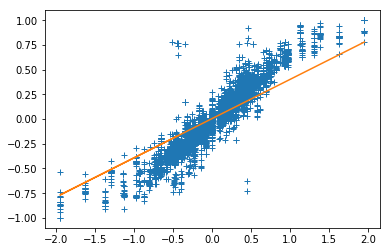

In [2]:
pwd = os.getcwd()
readname = "stft_2"
filepath = pwd + "/txt_data/" + readname + ".txt"
fr = open(filepath,'r')
datax = []
datay = []
while True:
    line = fr.readline()
    if not line:
        break
    line = line.strip().split()
    if len(line) >= 3:
        datax.append(float(line[1]))
        datay.append(float(line[2]))
fr.close()
plt.plot(datax,datay,'+')
datax = np.array(datax)
y = datax * ratio + bias 
plt.plot(datax, y, '-')